# Analysis of the competition

This notebook contains analyses of the **`Copa America 2021`**. The analyses included are: `Ball progression`, `Pressing`, `Shot performance`, `Defensive performance`, among others. Inspiration is primarly taken from [@Odriozolite](https://twitter.com/Odriozolite), [NinadB_06](https://twitter.com/NinadB_06), and [@exceedingxpuns](https://twitter.com/exceedingxpuns).

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import seaborn as sns

from highlight_text import htext
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
from mplsoccer import Pitch, VerticalPitch
from PIL import Image

In [2]:
pd.set_option('display.max_columns', 100)

## Set constants

In [3]:
countries = ['argentina', 'bolivia', 'brazil', 'colombia', 'chile', 'ecuador', 'paraguay', 'peru', 
             'uruguay', 'venezuela']

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

## 1. Ball progression among fullbacks

This analysis is inspired in [@Odriozolite](https://twitter.com/Odriozolite) who published the analysis [here](https://twitter.com/Odriozolite/status/1470770951000371207). It involves data about `progressive passes`, `progressive carries` and `number of touches`.

### Load data

In [4]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [5]:
# load possession
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_df['country'] = country
        possession_df = possession_df.append(aux_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country        

In [62]:
# merge datasets
analysis_df = pd.merge(passing_df, possession_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])

### Check data

In [63]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 52 columns


In [64]:
analysis_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19


### Filter data

**Remove goalkeepers**

In [65]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [66]:
print(f"After removing GKs the dataset contains {analysis_df.shape[0]} players")

After removing GKs the dataset contains 236 players


**Remove players who play less than 50% of the team's played minutes**

In [67]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [108]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

**Remove summary rows**

In [109]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

In [110]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 96 players who played more than 50% of their teams' minutes


**Select fullbacks**

In [111]:
fullbacks = ['Marcos Acuña', 'Gonzalo Montiel', 'Nicolás Tagliafico', 'Roberto Fernández', 'Diego Bejarano', 
             'Danilo', 'Renan Lodi', 'Daniel Muñoz', 'Mauricio Isla', 'Eugenio Mena', 'Pervis Estupiñán',
             'Ángelo Preciado', 'Júnior Alonso', 'Alberto Espínola', 'Santiago Arzamendia', 'Héctor David Martínez',
             'Aldo Corzo', 'Miguel Trauco', 'Matías Viña', 'Alexander González']

In [112]:
analysis_fdf.loc[analysis_fdf['player'].isin(fullbacks), 'pos'] = 'FB' 

In [116]:
analysis_fdf = analysis_fdf.loc[analysis_fdf['pos'] == 'FB']

In [117]:
print(f'There are {analysis_fdf.shape[0]} fullbacks')

There are 20 fullbacks


**Select columns**

In [118]:
cols = ['player', 'pos', 'country', '90s', 'prog', 'carries_prog', 'touches_touches', 'total_cmp', 'touches_live']

In [119]:
analysis_fdf = analysis_fdf[cols]

**Compute columns**

In [120]:
avg_completed_passes = analysis_fdf['total_cmp'].mean()

In [121]:
avg_completed_passes_by_country = analysis_fdf.groupby(by='country', as_index=False)['total_cmp'].mean()

In [122]:
avg_completed_passes_by_country.columns = ['country', 'avg_cmp_pass']

In [123]:
analysis_fdf['prog_pass/90'] = analysis_fdf['prog']/analysis_fdf['90s']

In [124]:
def compute_normalized_team_passes(row, avg_passes_competition, avg_passes_countries):
    avg_passes_country = \
        avg_passes_countries.loc[avg_passes_countries['country']==row['country'],'avg_cmp_pass'].values[0]
    return row['prog_pass/90'] * (avg_passes_country/avg_passes_competition)

In [125]:
analysis_fdf['norm_cmp_pass'] = analysis_fdf.apply(compute_normalized_team_passes, 
                                                   avg_passes_competition=avg_completed_passes, 
                                                   avg_passes_countries=avg_completed_passes_by_country,
                                                   axis=1)

In [126]:
analysis_fdf['prog_carries/90'] = analysis_fdf['carries_prog']/analysis_fdf['90s']

In [127]:
analysis_fdf['norm_prog_carries'] = analysis_fdf['prog_carries/90'] * (analysis_fdf['touches_live']/100)

In [129]:
analysis_fdf.head()

,player,pos,country,90s,prog,carries_prog,touches_touches,total_cmp,touches_live,prog_pass/90,norm_cmp_pass,prog_carries/90,norm_prog_carries
7,Marcos Acuña,FB,argentina,4.0,12,20,242,173,218,3.000000,2.308559,5.000000,10.900000
9,Gonzalo Montiel,FB,argentina,3.8,5,6,196,142,174,1.315789,1.012526,1.578947,2.747368
10,Nicolás Tagliafico,FB,argentina,3.7,11,8,151,95,128,2.972973,2.287761,2.162162,2.767568
16,Roberto Fernández,FB,bolivia,3.2,11,21,192,115,176,3.437500,2.071016,6.562500,11.550000
17,Diego Bejarano,FB,bolivia,3.0,7,10,146,99,123,2.333333,1.405781,3.333333,4.100000


### Draw scatterplot

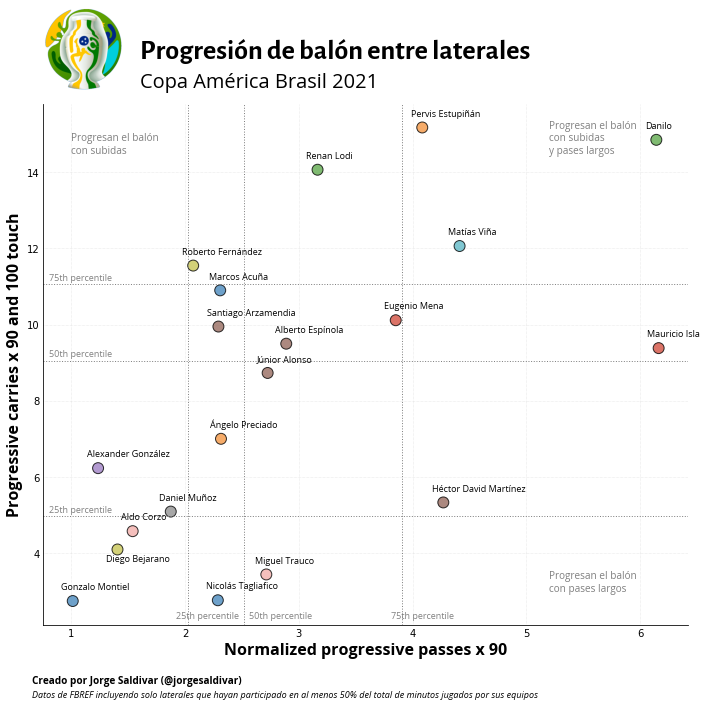

In [170]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_fdf['norm_cmp_pass'].values
y = analysis_fdf['norm_prog_carries'].values


ax.scatter(x, y, s=120, color=analysis_fdf['country'].map(colors), alpha=0.8, lw=1, zorder=2, edgecolor='black')
# add horizontal lines
ax.axhline(y=np.quantile(y, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.median(y), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.quantile(y, 0.75), color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=np.quantile(x, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.median(x), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.quantile(x, 0.75), color='gray', linestyle='dotted', lw=1)


fig.text(0.2,1.06,"Progresión de balón entre laterales",fontweight="bold", fontsize=28, fontfamily=title_font, 
         color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

ax.set_xlabel("Normalized progressive passes x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("Progressive carries x 90 and 100 touch", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add percentiles annotations
ax.annotate('25th percentile', (0.8, np.quantile(y,0.25)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (0.8, np.quantile(y,0.50)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (0.8, np.quantile(y,0.75)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('25th percentile', (np.quantile(x,0.25)-0.1, 2.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (np.quantile(x,0.50)+0.05, 2.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (np.quantile(x,0.75)-0.1, 2.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)

# add players' names
for i, txt in enumerate(analysis_fdf['player']):
    delta_x = -0.1
    delta_y = 0.3
    # In some cases put the name below the dot
    if txt in ['Diego Bejarano']:
        delta_y = -0.3
    ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=9, 
                color=text_color, zorder=3)

# add understanding info
ax.annotate('Progresan el balón\ncon subidas\ny pases largos',(5.2, 14.5), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón\ncon subidas', (1, 14.5), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón\ncon pases largos', (5.2, 3), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo laterales que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/progessive_ball_fb.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 2. Ball progression among central midfielders

This analysis is inspired in [@Odriozolite](https://twitter.com/Odriozolite) who published the analysis [here](https://twitter.com/Odriozolite/status/1470412416869490696). It involves data about `progressive passes`, `progressive carries` and `number of live touches`.

### Load data

In [171]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [172]:
# load possession
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_df['country'] = country
        possession_df = possession_df.append(aux_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country        

In [173]:
# merge datasets
analysis_df = pd.merge(passing_df, possession_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])

### Check data

In [174]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 52 columns


In [175]:
analysis_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19


### Filter data

**Remove players who play less than 50% of the team's played minutes**

In [176]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [177]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

**Remove summary rows**

In [178]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

In [179]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 106 players who played more than 50% of their teams' minutes


**Select midfielders**

In [183]:
central_midfielders = ['Rodrigo De Paul', 'Guido Rodríguez', 'Leandro Paredes', 'Giovani Lo Celso', 'Leonel Justiniano',
                       'Fred', 'Casemiro', 'Wílmar Barrios', 'Edwin Cardona', 'Charles Aránguiz', 'Arturo Vidal',
                       'Erick Pulgar', 'Jhegson Méndez', 'Moisés Caicedo', 'Alan Franco', 'Mathías Villasanti', 
                       'Yoshimar Yotún', 'Renato Tapia', 'Sergio Peña', 'Federico Valverde', 'Matías Vecino', 
                       'Nicolás De La Cruz', 'Nahitan Nández', 'Rodrigo Bentancur', 'Junior Moreno', 
                       'Cristian Cásseres Jr.', 'José Andrés Martínez']

In [184]:
analysis_fdf.loc[analysis_fdf['player'].isin(central_midfielders), 'pos'] = 'CM' 

In [185]:
analysis_fdf = analysis_fdf.loc[analysis_fdf['pos'] == 'CM']

In [186]:
print(f'There are {analysis_fdf.shape[0]} central midfielders')

There are 27 central midfielders


**Select columns**

In [187]:
cols = ['player', 'pos', 'country', '90s', 'prog', 'carries_prog', 'touches_touches', 'total_cmp', 'touches_live']

In [188]:
analysis_fdf = analysis_fdf[cols]

**Compute columns**

In [189]:
avg_completed_passes = analysis_fdf['total_cmp'].mean()

In [190]:
avg_completed_passes_by_country = analysis_fdf.groupby(by='country', as_index=False)['total_cmp'].mean()

In [191]:
avg_completed_passes_by_country.columns = ['country', 'avg_cmp_pass']

In [192]:
analysis_fdf['prog_pass/90'] = analysis_fdf['prog']/analysis_fdf['90s']

In [193]:
def compute_normalized_team_passes(row, avg_passes_competition, avg_passes_countries):
    avg_passes_country = \
        avg_passes_countries.loc[avg_passes_countries['country']==row['country'],'avg_cmp_pass'].values[0]
    return row['prog_pass/90'] * (avg_passes_country/avg_passes_competition)

In [194]:
analysis_fdf['norm_cmp_pass'] = analysis_fdf.apply(compute_normalized_team_passes, 
                                                   avg_passes_competition=avg_completed_passes, 
                                                   avg_passes_countries=avg_completed_passes_by_country,
                                                   axis=1)

In [195]:
analysis_fdf['prog_carries/90'] = analysis_fdf['carries_prog']/analysis_fdf['90s']

In [196]:
analysis_fdf['norm_prog_carries'] = analysis_fdf['prog_carries/90'] * (analysis_fdf['touches_live']/100)

In [197]:
analysis_fdf.head()

,player,pos,country,90s,prog,carries_prog,touches_touches,total_cmp,touches_live,prog_pass/90,norm_cmp_pass,prog_carries/90,norm_prog_carries
2,Rodrigo De Paul,CM,argentina,5.5,22,29,305,211,281,4.000000,3.821663,5.272727,14.816364
5,Giovani Lo Celso,CM,argentina,3.7,12,21,176,131,176,3.243243,3.098646,5.675676,9.989189
6,Guido Rodríguez,CM,argentina,4.7,8,7,290,216,282,1.702128,1.626240,1.489362,4.200000
9,Leandro Paredes,CM,argentina,3.9,10,8,245,196,225,2.564103,2.449784,2.051282,4.615385
15,Leonel Justiniano,CM,bolivia,3.8,11,14,159,122,158,2.894737,1.789987,3.684211,5.821053


### Draw scatterplot

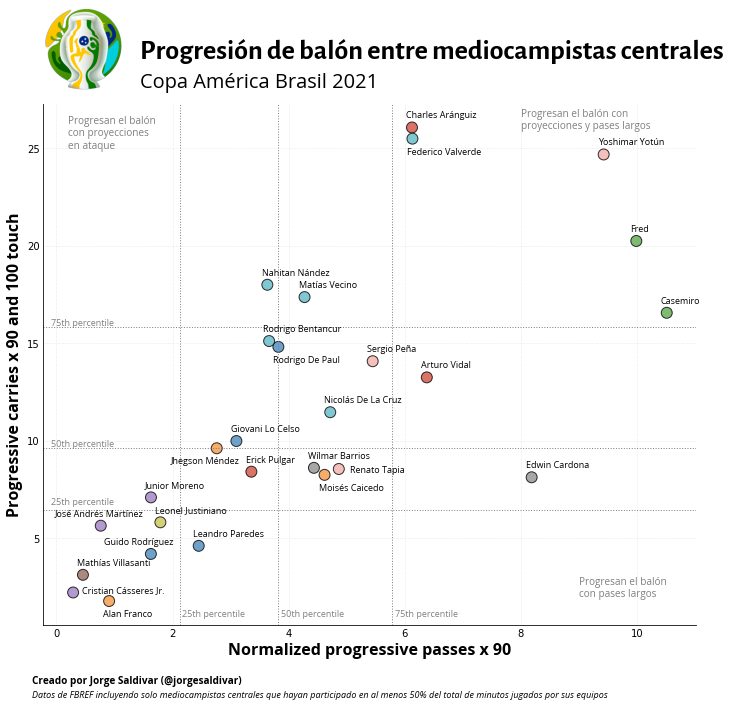

In [249]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_fdf['norm_cmp_pass'].values
y = analysis_fdf['norm_prog_carries'].values


ax.scatter(x, y, s=120, color=analysis_fdf['country'].map(colors), alpha=0.8, lw=1, zorder=2, edgecolor='black')
# add horizontal lines
ax.axhline(y=np.quantile(y, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.median(y), color='gray', linestyle='dotted', lw=1)
ax.axhline(y=np.quantile(y, 0.75), color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=np.quantile(x, 0.25), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.median(x), color='gray', linestyle='dotted', lw=1)
ax.axvline(x=np.quantile(x, 0.75), color='gray', linestyle='dotted', lw=1)


fig.text(0.2,1.06,"Progresión de balón entre mediocampistas centrales",fontweight="bold", fontsize=28, fontfamily=title_font, 
         color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

ax.set_xlabel("Normalized progressive passes x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("Progressive carries x 90 and 100 touch", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add percentiles annotations
ax.annotate('25th percentile', (-0.1, np.quantile(y,0.25)+0.3), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (-0.1, np.quantile(y,0.50)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (-0.1, np.quantile(y,0.75)+0.1), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('25th percentile', (np.quantile(x,0.25)+0.05, 1), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (np.quantile(x,0.50)+0.05, 1), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (np.quantile(x,0.75)+0.05, 1), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)

# add players' names
for i, txt in enumerate(analysis_fdf['player']):
    delta_x = -0.1
    delta_y = 0.5
    # In some cases put the name below the dot
    if txt in ['Federico Valverde', 'Rodrigo De Paul', 'Alan Franco', 'Moisés Caicedo']:
        delta_y = -0.8
    if txt in ['Jhegson Méndez']:
        delta_y = -0.8
        delta_x = -0.8
    if txt in ['José Andrés Martínez', 'Guido Rodríguez']:
        delta_x = -0.8
    if txt in ['Renato Tapia']:
        delta_x = 0.2
        delta_y = -0.2
    if txt in ['Cristian Cásseres Jr.']:
        delta_x = 0.15
        delta_y = -0.01
    ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=9, 
                color=text_color, zorder=3)

# add understanding info
ax.annotate('Progresan el balón con\nproyecciones y pases largos',(8, 26), fontfamily=body_font, 
            fontweight="regular", fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón\ncon proyecciones\nen ataque', (0.2, 25), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)
ax.annotate('Progresan el balón\ncon pases largos', (9, 2), fontfamily=body_font, fontweight="regular", 
            fontsize=10, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo mediocampistas centrales que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/progessive_ball_mf.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 3. Press and progess among forwards

This analysis is inspired in [@NinadB_06](https://twitter.com/NinadB_06) who published the analysis [here](https://twitter.com/NinadB_06/status/1470465745880502285). It involves data about `progressive passes` and `pressures`.